In [11]:
#import libraries
import os
import csv
import pandas as pd
import re
from dask import dataframe as dd
import plotly
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import warnings

# Reading and Cleaning the data:

In [2]:
# Read the files using dask:

ddf = dd.read_csv("data/*.csv")



# Turn the files into a pandas dataframe:

data = ddf[["category","launched_at", "name", "state"]]
df = data.compute()



# Clean the data:

df = df.drop_duplicates(keep='first')
df = df[df.launched_at != 0]



# Convert the 'launched_at' column (set in epoch time) to datetime:

df['launched_at'] = pd.to_datetime(df['launched_at'], unit='s')




# Create 'month' and 'year' columns from datetime 'launched_at' column:

df['month'] = df['launched_at'].dt.month
df['year'] = df['launched_at'].dt.year




# Sort the data by year and month:

df.set_index(['year','month'], inplace=True)
df.sort_index(inplace=True)
df.reset_index(level='month', inplace=True)
df.reset_index(level='year', inplace=True)




# Create a new column 'year_month' by concatenating the 'year' and 'month' columns:

df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str)

# Q1 Success Rate per Month and Year:

In [3]:

# Create new column with coded success or fail values (0,1)

df['success_rate'] = df['state'].apply(lambda x: 1 if x == 'successful' else 0)



# Calculate success rate per month:

success_rate_table = df.groupby(['year_month'])['success_rate'].mean().reset_index()


# Print the table:

success_rate_table

year_month  success_rate
0      2009-12      1.000000
1      2010-12      1.000000
2       2010-4      1.000000
3       2010-5      1.000000
4       2010-7      1.000000
..         ...           ...
134     2022-5      0.785714
135     2022-6      0.900000
136     2022-7      0.783784
137     2022-8      0.696970
138     2022-9      0.875000

[139 rows x 2 columns]

# Q1 Graph - Pyplot Line Graph

<AxesSubplot: xlabel='year_month'>

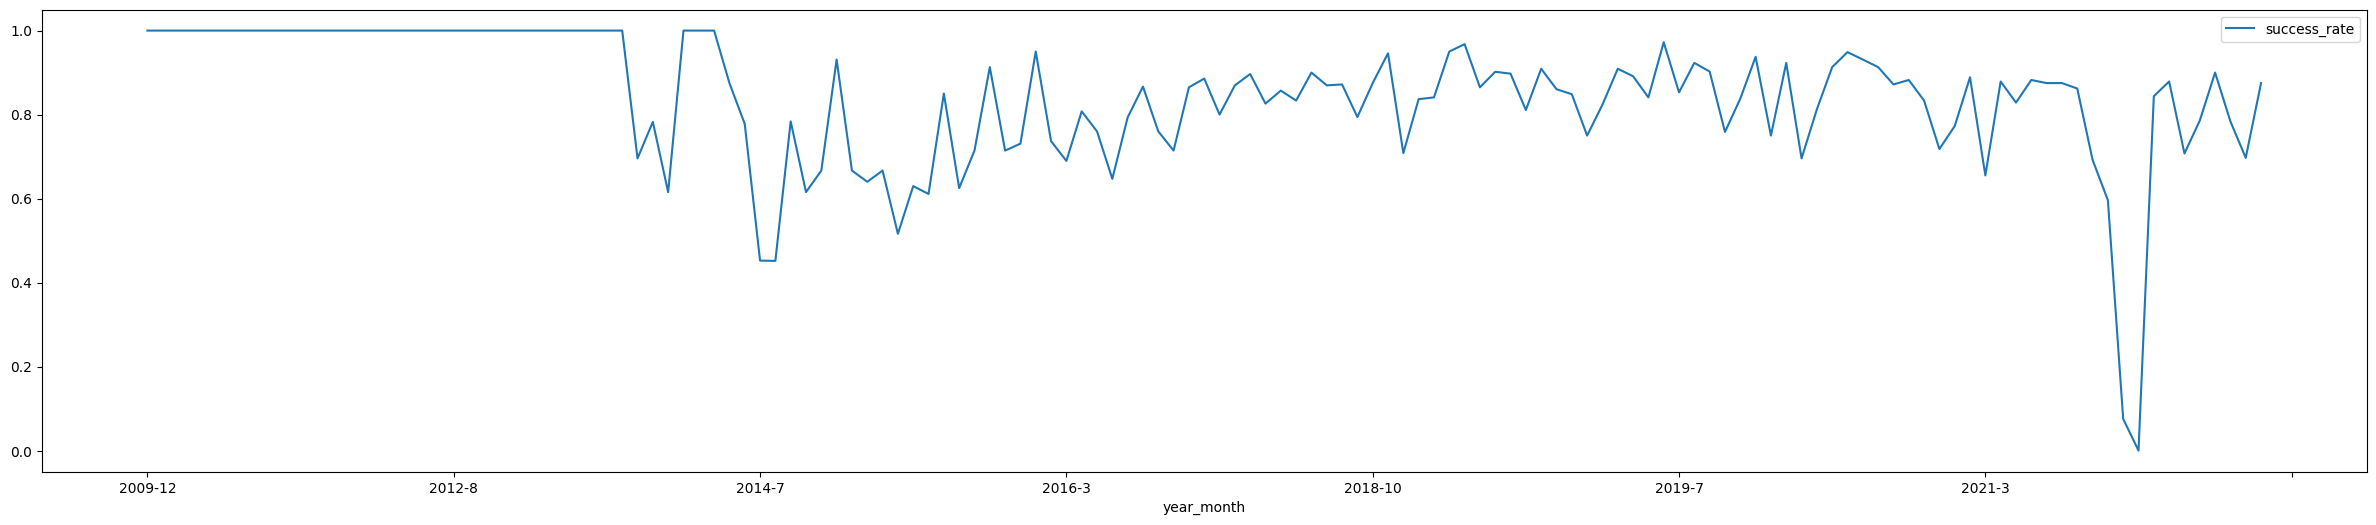

In [4]:

# Plot success rate per month:

success_rate_table.plot(x='year_month', y='success_rate', kind='line', figsize = (30,6))

# Q2 Success Rate per Category per Year and Month:


In [5]:

#Regex Aux Function for finding category name
def categoryName(text):
    r = re.search("([A-Z])\w+", text)
    return r.group(0)



# Use Function above to change category names to a usable format

dftemp = df
dftemp['category'] = dftemp['category'].map(lambda x: categoryName(x))



# Calculate mean successrate for each category for each month into table:

success_rate_table_per_cat = dftemp.pivot_table(index='year_month', columns='category', values='success_rate', aggfunc='mean')



# Print the table
success_rate_table_per_cat

category    Architecture     Audio  Civic  Comedy  Cookbooks  DIY  Design  \
year_month                                                                  
2009-12              NaN       NaN    NaN     NaN        NaN  NaN     NaN   
2010-12              NaN       NaN    NaN     NaN        NaN  NaN     NaN   
2010-4               NaN  1.000000    NaN     NaN        NaN  NaN     NaN   
2010-5               NaN       NaN    NaN     NaN        NaN  NaN     NaN   
2010-7               NaN       NaN    NaN     NaN        NaN  NaN     NaN   
...                  ...       ...    ...     ...        ...  ...     ...   
2022-5               NaN  0.666667    NaN     1.0        1.0  NaN     NaN   
2022-6               NaN  1.000000    NaN     1.0        1.0  NaN     NaN   
2022-7               NaN  0.000000    NaN     1.0        NaN  NaN     NaN   
2022-8               NaN       NaN    NaN     1.0        1.0  NaN     NaN   
2022-9               NaN  0.000000    NaN     1.0        1.0  NaN     NaN   

category    Graphic  Interactive  Literary     Music  Photo  Plays  Product  \
year_month                                                                    
2009-12         NaN          NaN       NaN       NaN    1.0    NaN      NaN   
2010-12         NaN          NaN  1.000000       NaN    NaN    NaN      NaN   
2010-4          NaN          NaN       NaN       NaN    NaN    NaN      NaN   
2010-5          NaN          NaN       NaN  1.000000    NaN    NaN      NaN   
2010-7          NaN          NaN  1.000000       NaN    NaN    NaN      NaN   
...             ...          ...       ...       ...    ...    ...      ...   
2022-5          NaN          NaN  0.800000  0.000000    NaN    1.0      NaN   
2022-6          NaN          NaN  0.625000  1.000000    0.0    1.0      NaN   
2022-7          NaN          NaN  0.400000  0.000000    0.0    1.0      NaN   
2022-8          NaN          NaN  0.166667  0.333333    0.0    1.0      NaN   
2022-9          NaN          NaN  1.000000  0.571429    NaN    1.0      NaN   

category    Sound    Spaces  Toys  Typography  Webcomics  
year_month                                                
2009-12       NaN       NaN   NaN         NaN        NaN  
2010-12       NaN       NaN   NaN         NaN        NaN  
2010-4        NaN       NaN   NaN         NaN        NaN  
2010-5        NaN       NaN   NaN         NaN        NaN  
2010-7        NaN  1.000000   NaN         NaN        NaN  
...           ...       ...   ...         ...        ...  
2022-5        NaN  0.333333   NaN         NaN        1.0  
2022-6        1.0  0.500000   NaN         NaN        1.0  
2022-7        1.0  1.000000   NaN         NaN        1.0  
2022-8        1.0  0.000000   NaN         NaN        1.0  
2022-9        1.0  1.000000   NaN         NaN        1.0  

[139 rows x 19 columns]

# Q2: Graphing (Line Graph with matplotlib):


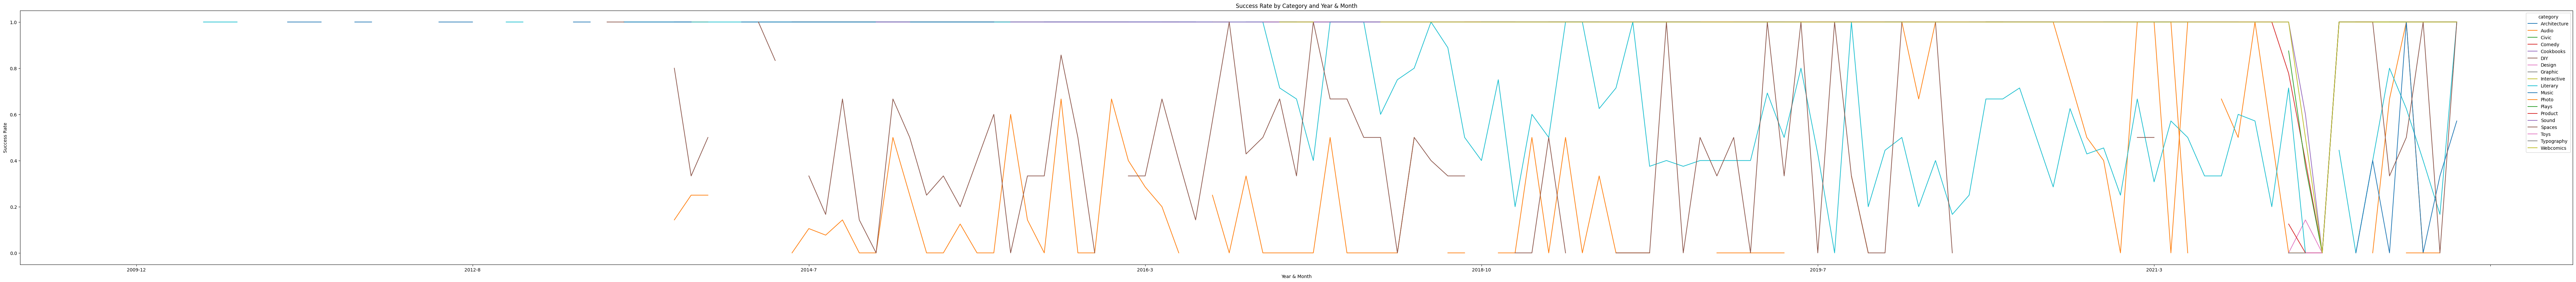

In [6]:

# Plot the success rate per month and category using matplotlib 

success_rate_table_per_cat.plot(kind='line', title='Success Rate by Category and Year & Month',  figsize=(100, 10))



# Label the graph

plt.xlabel('Year & Month')
plt.ylabel('Success Rate')



# Print the graph

plt.show()

# Q2: Graphing (Line Graph with plotly):


In [7]:
#Q2 Graphing - Line Graph Plotly

# Use warnings to ignore errors caused by large pandas dataframe:

warnings.simplefilter(action='ignore', category = pd.errors.PerformanceWarning)


# Create line graph using Plotly:

fig = px.line(success_rate_table_per_cat, title='Success Rate by Category and Month')


# Print the graph

fig.show()

# Q2: Graphing (Heatmap with plotly):


In [8]:

# Create a list of coordinates for plotly graph 

def df_to_plotly(df):
    return {'z': df.values.tolist(),
            'x': df.columns.tolist(),
            'y': df.index.tolist()}



# Plot the success rate per month and category using plotly

fig = go.Figure(data=go.Heatmap(df_to_plotly(success_rate_table_per_cat)))



# Print the graph

fig.show()